##García Hernández Mario Yahir


## Ejercicio 1: Implementación y Optimización de una Red Neuronal Densa (20 puntos)
**Objetivo:** Implementar una red neuronal multicapa para resolver un problema de clasificación binaria con un conjunto de datos numéricos y optimizar el modelo usando técnicas de regularización y ajuste de hiperparámetros.

**Instrucciones:**
1. Utiliza el conjunto de datos `make_moons` de `sklearn.datasets` para generar un problema de clasificación binaria. Genera un total de 1,000 puntos de datos con un 20% de ruido.
2. Implementa una red neuronal densa con las siguientes características:
   - Al menos dos capas ocultas con funciones de activación ReLU.
   - Usa la función de activación sigmoide en la capa de salida para la clasificación binaria.
   - Implementa técnicas de regularización como Dropout y L2 para evitar el sobreajuste.
3. Ajusta los hiperparámetros de la red (número de neuronas, tasa de aprendizaje, número de épocas) y documenta cómo estos cambios afectan el rendimiento del modelo. Muestra las curvas de pérdida y precisión durante el entrenamiento.
4. Evalúa el modelo con el conjunto de prueba y genera una gráfica que muestre la frontera de decisión de la red entrenada.
5. Describe tus observaciones sobre el ajuste de los hiperparámetros y la efectividad de las técnicas de regularización implementadas.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers


In [ ]:
# Generar datos make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = models.Sequential()

# Primera capa oculta con ReLU y regularización L2
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(2,)))
model.add(layers.Dropout(0.5))

# Segunda capa oculta con ReLU y regularización L2
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.5))

# Capa de salida con activación sigmoide para clasificación binaria
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6602 - loss: 1.2835 - val_accuracy: 0.8500 - val_loss: 1.0908
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8216 - loss: 1.0634 - val_accuracy: 0.8500 - val_loss: 0.9011
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8655 - loss: 0.8692 - val_accuracy: 0.8500 - val_loss: 0.7575
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8542 - loss: 0.7637 - val_accuracy: 0.8500 - val_loss: 0.6608
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8639 - loss: 0.6786 - val_accuracy: 0.8562 - val_loss: 0.5944
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8737 - loss: 0.6143 - val_accuracy: 0.8625 - val_loss: 0.5430
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8862 - loss: 0.5265 - val_accuracy: 0.8625 - val_loss: 0.5036
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8688 - loss: 0.5158 - val_accuracy: 0.8625 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9562 - loss: 0.2116  
Precisión en el conjunto de prueba: 0.9549999833106995


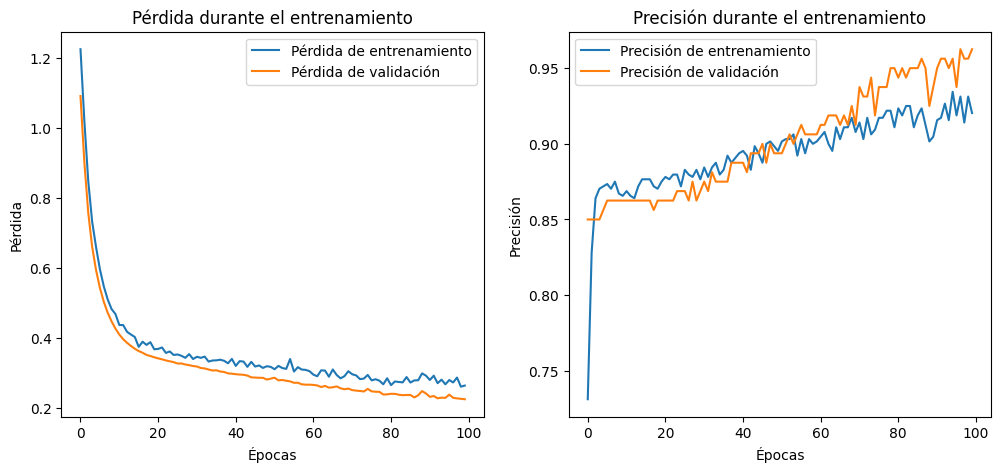

In [ ]:
# Graficar pérdida y precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


#Observasiones de los hiperparametros
Número de neuronas: Más neuronas en capas ocultas pueden mejorar la capacidad de modelado, pero pueden sobreajustar si no se controla el sobreajuste con regularización.

Dropout: Ayuda a prevenir el sobreajuste al "apagar" neuronas durante el entrenamiento.

L2 Regularization: Da pasas "pqueños", reduciendo la complejidad del modelo para evitar el sobreajuste.

Learning rate: Una tasa de aprendizaje demasiado alta puede hacer que el modelo no converja, mientras que una demasiado baja puede hacer el entrenamiento lento.

# Ejercicio 2: Redes Neuronales Convolucionales (CNN)
### Objetivo:
Implementar una red neuronal convolucional (CNN) para clasificar imágenes de hojas de plantas como sanas o enfermas utilizando un conjunto de datos específico. La tarea incluye preprocesar las imágenes, diseñar y entrenar la CNN, y evaluar su rendimiento en un conjunto de prueba.

### Conjunto de Datos:
Utiliza el conjunto de datos proporcionado en el siguiente enlace: [Plant Leaf Dataset](https://drive.google.com/drive/folders/1mPAoLksg5f5YgqX7psVdUUuz7fwexgfz?usp=sharing).

Este dataset contiene imágenes de hojas de plantas categorizadas como sanas o enfermas.


### Instrucciones Detalladas:
1. **Importación y Exploración del Conjunto de Datos:**
   - Descarga el conjunto de datos desde el enlace proporcionado y cárgalo en tu entorno de trabajo (Google Colab).
   - Asegúrate de verificar las clases y la estructura del conjunto de datos (nombres de carpetas, formato de las imágenes, etc.).

2. **Preprocesamiento de Imágenes:**
   - **Normalización:** Escala los valores de los píxeles a un rango entre 0 y 1 dividiendo por 255 para mejorar la eficiencia del entrenamiento.
   - **División de Datos:** Divide el conjunto de datos en tres subconjuntos: entrenamiento, validación y prueba (por ejemplo, 70% entrenamiento, 15% validación, 15% prueba).

3. **Implementación de la CNN:**
   - **Diseño de la Red:** Implementa una CNN con al menos dos capas convolucionales y de pooling.
   - **Compilación del Modelo:** Usa el optimizador `Adam`, la función de pérdida `binary_crossentropy`, y como métrica de evaluación `accuracy`.

4. **Entrenamiento del Modelo:**
   - Entrena la red con el conjunto de entrenamiento y valida con el conjunto de validación.
   - Visualiza las curvas de pérdida y precisión durante el entrenamiento.

5. **Evaluación del Modelo:**
   - Evalúa el rendimiento del modelo en el conjunto de prueba y visualiza la matriz de confusión.

6. **Visualización de Resultados:**
   - Muestra ejemplos de imágenes correctamente clasificadas y ejemplos de errores para entender mejor el comportamiento del modelo.


In [ ]:
# Descargar el archivo ZIP desde Google Drive
import gdown
gdown.download("https://drive.google.com/uc?id=1v6oaHz6JC-xQV0fWXfNG9SVQs1nK_koA", "dataset.zip", quiet=False)

# Descomprimir el archivo ZIP
import zipfile
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')  # Cambiar 'dataset' a la carpeta deseada

# Verificar la estructura del conjunto de datos
import os
data_dir = 'dataset/hojas'  # Ajustar el directorio para apuntar a la carpeta 'hojas'
print("Contenidos del directorio 'hojas':")
print(os.listdir(data_dir))  # Mostrar archivos y carpetas en el directorio 'hojas'

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
import numpy as np
import cv2  # Importar OpenCV para cargar imágenes

# Obtener los nombres de las clases desde el directorio 'hojas'
class_names = os.listdir(data_dir)
image_paths = []
labels = []

# Recopilar rutas de imágenes y etiquetas
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    print(f"Procesando directorio: {class_dir}")  # Línea de depuración
    if os.path.isdir(class_dir):
        for image_file in os.listdir(class_dir):
            # Verificar si el archivo es una imagen (extensiones de imagen comunes)
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_paths.append(os.path.join(class_dir, image_file))
                labels.append(class_name)

# Convertir a arreglos numpy para facilitar la manipulación
image_paths = np.array(image_paths)
labels = np.array(labels)

# Cargar imágenes en formato de matrices
X = []
y = []

for path in image_paths:
    img = cv2.imread(path)  # Cargar la imagen
    img = cv2.resize(img, (224, 224))  # Redimensionar la imagen si es necesario
    X.append(img)

# Convertir listas a arreglos numpy
X = np.array(X)
y = labels  # Las etiquetas ya están en formato numpy

# Particionar los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir el número de imágenes en cada conjunto
print(f"Imágenes de entrenamiento: {X_train.shape[0]}")
print(f"Imágenes de prueba: {X_test.shape[0]}")



Downloading...
From: https://drive.google.com/uc?id=1v6oaHz6JC-xQV0fWXfNG9SVQs1nK_koA
To: /content/dataset.zip
100%|██████████| 236k/236k [00:00<00:00, 58.9MB/s]


Contenidos del directorio 'hojas':
['enfermas', 'sanas']
Procesando directorio: dataset/hojas/enfermas
Procesando directorio: dataset/hojas/sanas
Imágenes de entrenamiento: 240
Imágenes de prueba: 60


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import cv2

# Crear un generador de imágenes con normalización (dividir por 255)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

# Cargar datos de entrenamiento y validación
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Usar conjunto de entrenamiento (70%)
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Usar conjunto de validación (15%)
)


Found 256 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

# Crear el modelo de la CNN
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Capa densa completamente conectada
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5397 - loss: 0.9089 - val_accuracy: 0.5000 - val_loss: 0.4848
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8421 - loss: 0.3409 - val_accuracy: 1.0000 - val_loss: 0.0714
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 1.0000 - loss: 0.0358 - val_accuracy: 1.0000 - val_loss: 1.9873e-05
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 6.9593e-06 - val_accuracy: 1.0000 - val_loss: 4.2705e-07
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 2.3236e-06 - val_accuracy: 1.0000 - val_loss: 1.1110e-06
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 6.0562e-08 - val_accuracy: 1.0000 - val_loss: 1.8087e-08
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 8.9603e-10 - val_accuracy: 1.0000 - val_loss: 1.6674e-09
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 1.0291e-09 - val_accu

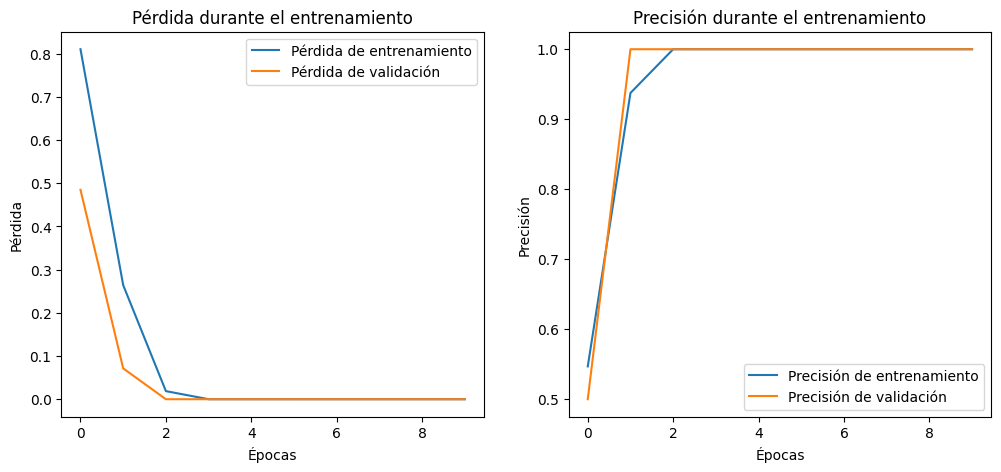

In [ ]:
# Graficar pérdida y precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


In [ ]:
# Cargar datos de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    data_dir,  # Asegúrate de que apunte a la carpeta correcta
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Importante para no mezclar el orden de las etiquetas
)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_generator)
print(f'Precisión en el conjunto de prueba: {test_acc}')


Found 300 images belonging to 2 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 556ms/step - accuracy: 1.0000 - loss: 3.6458e-10
Precisión en el conjunto de prueba: 1.0


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 457ms/step


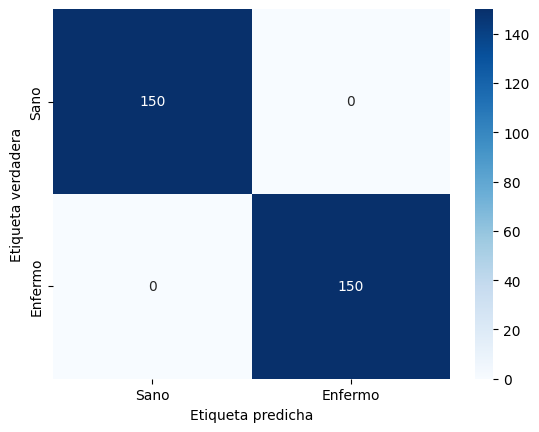

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar predicciones en el conjunto de prueba
Y_pred = model.predict(test_generator)
y_pred = np.where(Y_pred > 0.5, 1, 0)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sano", "Enfermo"], yticklabels=["Sano", "Enfermo"])
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')
plt.show()
